In [1]:
import numpy as np
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torch.utils.data import random_split
from torchvision import datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#48 x 48 images, greyscale, very imbalanced number of classes in the training set

transform = torchvision.transforms.Compose([
            torchvision.transforms.Resize(48), #48 is FER2013 size
            torchvision.transforms.ToTensor()
            #transforms.Normalize(mean=[], std=[])
])

In [3]:
data_if = datasets.ImageFolder(root='../datasets/FER2013/train', transform = transform)

[[163 128 114 ... 139 141 134]
 [147 114 102 ... 142 138 138]
 [112 106  92 ... 140 141 134]
 ...
 [139 141 136 ... 154 171 191]
 [140 133 120 ... 138 146 158]
 [136 134 113 ... 146 144 144]]


Text(0.5, 1.0, 'Fear')

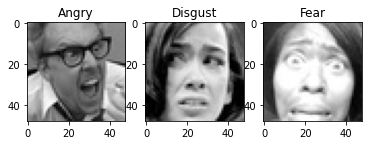

In [22]:
img = Image.open('../datasets/FER2013/train/angry/Training_3908.jpg')
img1 = Image.open('../datasets/FER2013/train/disgust/Training_659019.jpg')
img2 = Image.open('../datasets/FER2013/train/fear/Training_630805.jpg')

print(np.asarray(img))
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#plt.subplot(1,3,3)
ax1.imshow(img, cmap='gray')
ax1.set_title('Angry')
ax2.imshow(img1, cmap='gray')
ax2.set_title('Disgust')

ax3.imshow(img2, cmap='gray')
ax3.set_title('Fear')


In [12]:
#need to get a validation set of some sort, going to get everything in terms of a np array 
directory = r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train"
dirs = [r'\angry', r'\disgust', r'\fear', r'\happy', r'\neutral', r'\sad', r'\surprise'] #disgust has least number of classes, has 436 images
i = 0
X = []
y = []
for d in dirs:
    curr_dir = directory + d
    num_app = 0
    for filename in os.listdir(curr_dir):
        if filename.endswith('.jpg'):
            file = os.path.join(curr_dir, filename)
            img = Image.open(file)
            X.append(np.asarray(img))
            y.append(i) # will binarize these later
            num_app += 1
            #if(num_app > 436):
            #    break
    print("filename: ", curr_dir)
    print(i)
    i = i + 1

filename:  C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\angry
0
filename:  C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\disgust
1
filename:  C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\fear
2
filename:  C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\happy
3
filename:  C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\neutral
4
filename:  C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\sad
5
filename:  C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\surprise
6


In [13]:
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape


((28709, 48, 48), (28709,))

In [14]:
#create validation set from training data, WONT use stratified for now, can change this later
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 37)

In [15]:
#now need to binarize the labels
##lb = preprocessing.LabelBinarizer()
#lb.fit(y_train)
#y_train = lb.transform(y_train)
#y_val = lb.transform(y_val)

y_val.shape, y_train.shape

((5742,), (22967,))

In [16]:
np.save(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\X_train.npy", X_train)
np.save(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\y_train.npy", y_train)
np.save(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\X_val.npy", X_val)
np.save(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\y_val.npy", y_val)